# 스포티파이 마케팅 타겟 선정을 위한 분석

2023.12.29 ~ 2024.01.05

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 스포티파이 마케팅 타겟 선정을 위한 분석
- 설명: 스포티파이 유저 설문 데이터를 이용하여, 구독 가능성이 높은 유저와, 구독 취소 위험성이 높은 유저를 식별해 낸다.
- 사용한 데이터셋
    - [Spotify User Behavior Dataset](https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset/): 유저 분석을 위한 종합 Spotify 데이터 세트
- 진행 절차 및 내용
    - 내용1
    - 내용2
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pickle

from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
spotify_df = pd.read_excel('Spotify_data.xlsx')
spotify_df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [6]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [7]:
spotify_df.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

|컬럼명|설명|
|:---:|:---|
|Age|사용자의 연령 그룹|
|Gender|사용자의 성별|
|spotify_usage_period|Spotify를 사용한 지 얼마나 되었습니까?|
|spotify_listening_device|Spotify를 듣기 위해 주로 사용하는 기기는?|
|spotify_subscription_plan|현재 보유하고 있는 Spotify 구독 플랜은 무엇입니까?|
|premium_sub_willness|프리미엄 구독을 이용하실 의향이 있으신가요, 아니면 앞으로도 계속 프리미엄 구독을 하실 의향이 있으신가요?|
|prefered_premium_plan|프리미엄 또는 프리미엄을 가져갈 의향이 있는 경우 구독에 대해 지불하는 금액은 얼마입니까?|
|preferred_listening_content|더 듣기를 선호하는 것은 무엇입니까?|
|fav_music_general|어떤 장르의 음악을 가장 즐겨 듣나요?|
|music_time_slot|음악을 듣기에 가장 좋아하는 시간대는?|
|music_Influencial_mood|음악을 듣는 것에 있어서, 다음 중 어떤 분위기나 상황이 당신의 음악 선택에 가장 강하게 영향을 미치는가?|
|music_lis_frequency|언제 음악을 더 자주 듣나요?|
|music_expl_method|Spotify에서 새로운 음악을 어떻게 발견하나요?|
|music_recc_rating|스포티파이 음악 추천은 어떻게 평가하나요?|
|pod_lis_frequency|팟캐스트를 얼마나 자주 듣나요?|
|fav_pod_general|팟캐스트의 어떤 장르를 가장 즐겨?|
|prefered_pod_format|일반적으로 선호하는 팟캐스트 포맷은 무엇인가?|
|pod_host_preferences|당신은 알려지지 않은 사람들의 팟캐스트를 듣는 경향이 더 있는가, 아니면 잘 알려진 사람들이 진행하는 팟캐스트를 더 선호하는가?|
|prefered_pod_duration|팟캐스트 에피소드가 짧은 편(30분 미만) 또는 긴 편(30분 이상)을 선호하십니까|
|pod_variety|Spotify에서 팟캐스트의 다양성과 가용성에 만족하십니까?|

### 2-2. 데이터 분포 확인 및 전처리

#### 2-2-1. 컬럼별 분포 확인 (나이)

In [21]:
order_dict = {'6-12': 1, '12-20': 2, '20-35': 3, '35-60': 4, '60+': 5}

age_df = spotify_df['Age'].value_counts().sort_index(key=lambda x:x.map(order_dict))
age_df

6-12       3
12-20     71
20-35    422
35-60     23
60+        1
Name: Age, dtype: int64

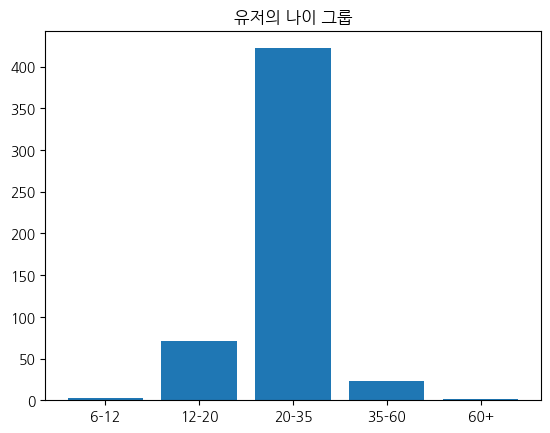

In [23]:
plt.bar(
    age_df.index,
    age_df
)

plt.title('유저의 나이 그룹')
plt.show()

20-35세가 압도적이고, 12-20세가 그 다음이다. 확실히 **젊은 연령층**의 수가 많다.

현재 카테고리형으로 주어져 있는 상태인데 이를 numeric하게 변경하기 위해 **중앙값**으로 변환한다. 단, 60세 이상의 경우 60으로 넣는다.

In [3]:
def process_age(txt):
    try:
        return np.median(list(map(int, txt.split('-'))))
    except:
        return 60

spotify_df['age_median'] = spotify_df['Age'].apply(process_age)
spotify_df[['Age', 'age_median']]

,Age,age_median
0,20-35,27.5
1,12-20,16.0
2,35-60,47.5
3,20-35,27.5
4,20-35,27.5
...,...,...
515,20-35,27.5
516,20-35,27.5
517,20-35,27.5
518,20-35,27.5


#### 2-2-2. 컬럼별 분포 확인 (성별)

In [24]:
spotify_df['Gender'].value_counts()

Female    391
Male      114
Others     15
Name: Gender, dtype: int64

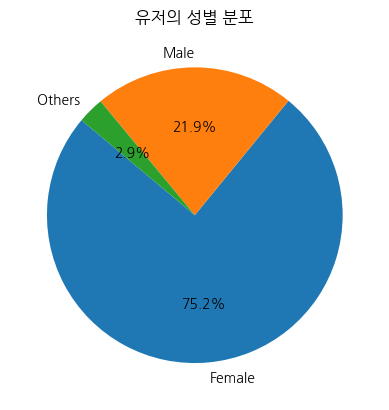

In [31]:
plt.pie(
    spotify_df['Gender'].value_counts(),
    labels=spotify_df['Gender'].value_counts().index,
    autopct='%.1f%%',
    startangle=140
)

plt.title('유저의 성별 분포')

plt.show()

여성 유저가 남성 유저에 비해 훨씬 많다.

In [4]:
spotify_df['gender_binary'] = spotify_df['Gender'].map({'Male': 0, 'Female': 1, 'Others': 2})

spotify_df[['Gender', 'gender_binary']]

,Gender,gender_binary
0,Female,1
1,Male,0
2,Others,2
3,Female,1
4,Female,1
...,...,...
515,Female,1
516,Female,1
517,Female,1
518,Female,1


#### 2-2-3. 컬럼별 분포 확인 (이용 기간)

In [5]:
period_dict = {
    'Less than 6 months': 6, '6 months to 1 year': 9, '1 year to 2 years': 18, 'More than 2 years': 24
}

period_df = spotify_df['spotify_usage_period'].value_counts().sort_index(key=lambda x:x.map(period_dict))
period_df

Less than 6 months     91
6 months to 1 year    119
1 year to 2 years     141
More than 2 years     169
Name: spotify_usage_period, dtype: int64

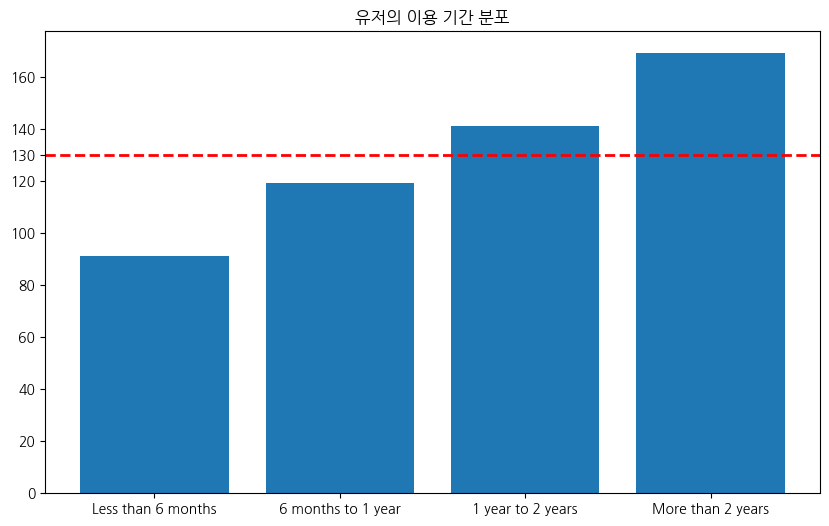

In [47]:
plt.figure(figsize=(10, 6))

plt.bar(
    period_df.index,
    period_df
)

plt.title('유저의 이용 기간 분포')
plt.axhline(period_df.mean(), color='red', linestyle='--', linewidth=2)
plt.yticks([i for i in range(0, 161, 20)] + [period_df.mean()])

plt.show()

2년 이상 **장기 이용자**가 많다. 스포티파이가 이미 성숙기에 접어들었음을 확인할 수 있는 대목이다.

이 컬럼 역시 범주형이기 때문에, 개월 수의 중앙값을 취한 컬럼을 생성한다. 단, 6개월 미만 및 2년 이상은 각각 6, 24로 넣는다.

In [6]:
spotify_df['period_median'] = spotify_df['spotify_usage_period'].map(period_dict)
spotify_df[['spotify_usage_period', 'period_median']]

,spotify_usage_period,period_median
0,More than 2 years,24
1,More than 2 years,24
2,6 months to 1 year,9
3,1 year to 2 years,18
4,1 year to 2 years,18
...,...,...
515,More than 2 years,24
516,More than 2 years,24
517,More than 2 years,24
518,6 months to 1 year,9


#### 2-2-4. 컬럼별 분포 확인 (구독 관련)

In [50]:
spotify_df['spotify_subscription_plan'].value_counts()

Free (ad-supported)            424
Premium (paid subscription)     96
Name: spotify_subscription_plan, dtype: int64

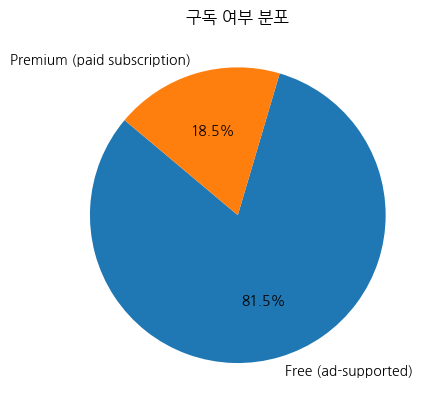

In [55]:
plt.pie(
    spotify_df['spotify_subscription_plan'].value_counts(),
    labels=spotify_df['spotify_subscription_plan'].value_counts().index,
    startangle=140,
    autopct='%.1f%%'
)

plt.title('구독 여부 분포')

plt.show()

프리미엄 구독 중인 고객보다 무료 이용 고객이 훨씬 많다.

In [7]:
spotify_df['subscription_binary'] = spotify_df['spotify_subscription_plan'].map({
    'Free (ad-supported)': 0,
    'Premium (paid subscription)': 1
})

spotify_df[['spotify_subscription_plan', 'subscription_binary']]

,spotify_subscription_plan,subscription_binary
0,Free (ad-supported),0
1,Free (ad-supported),0
2,Free (ad-supported),0
3,Free (ad-supported),0
4,Free (ad-supported),0
...,...,...
515,Free (ad-supported),0
516,Free (ad-supported),0
517,Free (ad-supported),0
518,Premium (paid subscription),1


In [10]:
spotify_df['premium_sub_willingness']

0      Yes
1      Yes
2      Yes
3       No
4       No
      ... 
515    Yes
516    Yes
517     No
518    Yes
519    Yes
Name: premium_sub_willingness, Length: 520, dtype: object

In [15]:
willingness_by_subscription = spotify_df.groupby(['spotify_subscription_plan', 'premium_sub_willingness']).agg({
    'subscription_binary': 'count',
}).rename(columns={'subscription_binary': 'count'})

willingness_by_subscription

count
spotify_subscription_plan   premium_sub_willingness       
Free (ad-supported)         No                         310
                            Yes                        114
Premium (paid subscription) No                          24
                            Yes                         72

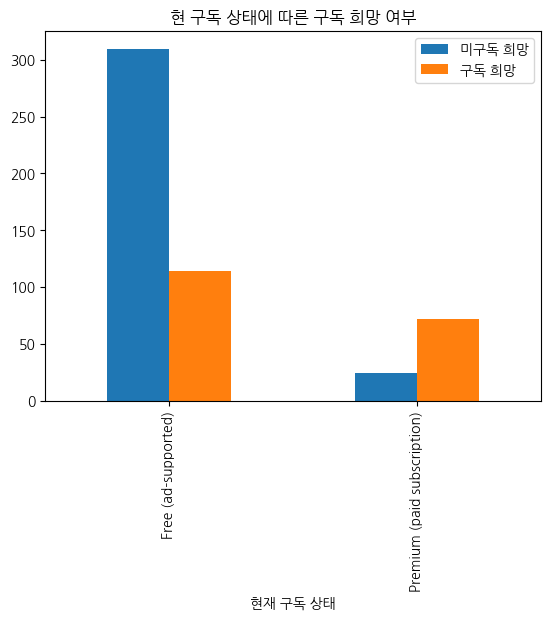

In [23]:
willingness_by_subscription.unstack().plot(kind='bar')
plt.title('현 구독 상태에 따른 구독 희망 여부')
plt.legend(['미구독 희망', '구독 희망'])
plt.xlabel('현재 구독 상태')

plt.show()

현재 구독 중인 사람들은 계속 구독을 유지하겠다는 의견이 많고, 현재 무료로 이용 중인 사람들은 계속 무료로 이용하겠다는 의견이 많다. 스포티파이 비즈니스의 잠재적 목표를 다음과 같이 정의해 볼 수 있다.

- (Free, No)에 속한 사람들을 (Free, **Yes**)로 옮긴다.
- (Premium, No)에 속한 사람들을 (Premium, **Yes**)로 옮긴다.

In [25]:
spotify_df['preffered_premium_plan'].value_counts()

None                              208
Individual Plan- Rs 119/ month     95
Student Plan-Rs 59/month           94
Duo plan- Rs 149/month             84
Family Plan-Rs 179/month           39
Name: preffered_premium_plan, dtype: int64

In [35]:
premium_plan_dict = {
    'None': 0, 'Individual Plan- Rs 119/ month': 119, 'Student Plan-Rs 59/month': 59,
    'Duo plan- Rs 149/month': 149, 'Family Plan-Rs 179/month': 179
}

premium_plan = spotify_df['preffered_premium_plan'].value_counts().sort_index(key=lambda x:x.map(premium_plan_dict))
premium_plan

None                              208
Student Plan-Rs 59/month           94
Individual Plan- Rs 119/ month     95
Duo plan- Rs 149/month             84
Family Plan-Rs 179/month           39
Name: preffered_premium_plan, dtype: int64

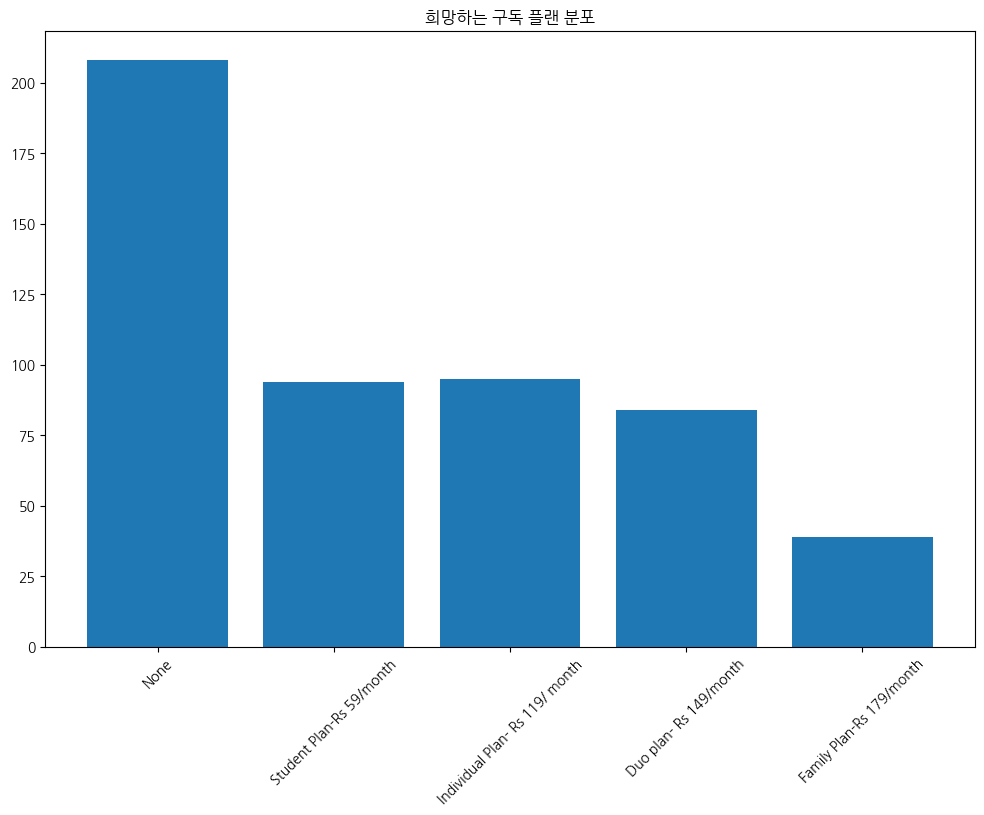

In [36]:
plt.figure(figsize=(12, 8))
plt.bar(
    premium_plan.index,
    premium_plan
)

plt.title('희망하는 구독 플랜 분포')
plt.xticks(rotation=45)
plt.show()

무료 플랜에 대한 선호도가 가장 높다. 학생 요금제를 제외하고, 일반 요금제들끼리 비교해 보면 **구독료가 비쌀수록 수요가 낮다.**

마찬가지로 범주형 데이터를 정수형으로 변환하는 과정을 거친다.

In [43]:
spotify_df['preffered_premium_plan_numeric'] = spotify_df['preffered_premium_plan'].map(premium_plan_dict)
spotify_df[['preffered_premium_plan', 'preffered_premium_plan_numeric']]

,preffered_premium_plan,preffered_premium_plan_numeric
0,Family Plan-Rs 179/month,179
1,Individual Plan- Rs 119/ month,119
2,Student Plan-Rs 59/month,59
3,None,0
4,None,0
...,...,...
515,Student Plan-Rs 59/month,59
516,Student Plan-Rs 59/month,59
517,Student Plan-Rs 59/month,59
518,Individual Plan- Rs 119/ month,119


#### 2-2-5. 컬럼별 분포 확인 (음악 취향)

In [45]:
spotify_df['preferred_listening_content'].value_counts()

Music      410
Podcast    110
Name: preferred_listening_content, dtype: int64

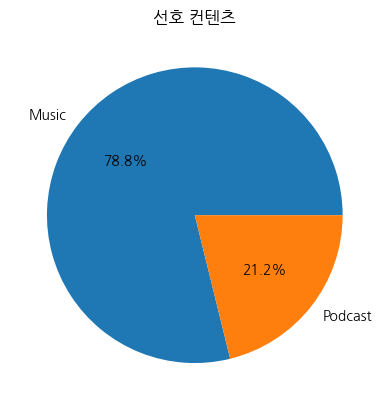

In [50]:
plt.pie(
    spotify_df['preferred_listening_content'].value_counts(),
    labels=spotify_df['preferred_listening_content'].value_counts().index,
    autopct='%.1f%%'
)

plt.title('선호 컨텐츠')

plt.show()

스포티파이 이용자들은 팟캐스트를 통해 음악을 듣는 것보다 자신이 직접 **음악을 찾아서** 듣는 것을 더 좋아한다. 그렇기 때문에 이후 분석에서 팟캐스트 관련 데이터들은 제외하고, 음악 관련 데이터들만 다루도록 한다.

In [52]:
spotify_df['fav_music_genre'].value_counts()

Melody                       259
classical                     87
Pop                           85
Rap                           55
Electronic/Dance              16
All                            6
Rock                           4
Kpop                           4
Classical & melody, dance      2
Old songs                      1
trending songs random          1
Name: fav_music_genre, dtype: int64

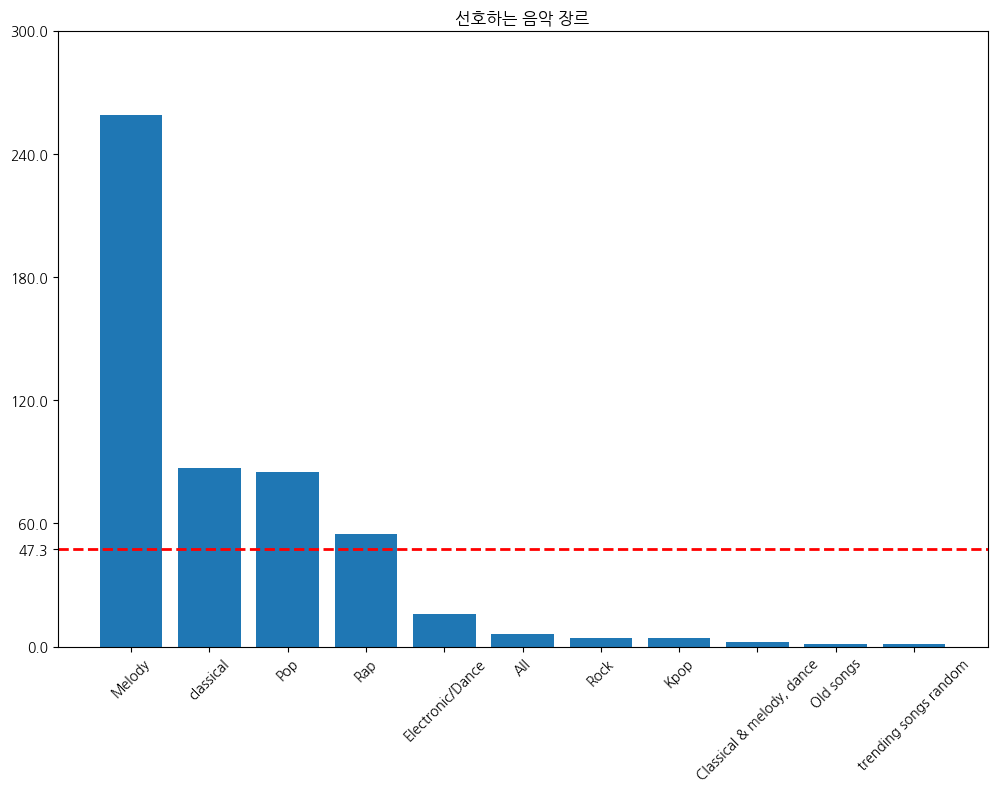

In [64]:
plt.figure(figsize=(12, 8))
plt.bar(
    spotify_df['fav_music_genre'].value_counts().index,
    spotify_df['fav_music_genre'].value_counts()
)

plt.title('선호하는 음악 장르')
plt.axhline(spotify_df['fav_music_genre'].value_counts().mean(), color='red', linewidth=2, linestyle='--')
plt.xticks(rotation=45)
plt.yticks([i for i in range(0, 301, 60)] + [spotify_df['fav_music_genre'].value_counts().mean()])

plt.show()

평균보다 높은 선호도를 보인 장르는 **Melody, Classical, Pop, Rap**이다. 음악 스트리밍 서비스에 대해 내가 생각하는 것과 본 데이터 구성원들이 생각하는 게 꽤 괴리가 있는 것 같다. 내 생각엔 팝, 랩 같은 장르를 듣지 멜로디나 클래식을 들을 것 같지는 않았는데 오히려 그 둘이 지배적이다.

마찬가지로 categorical을 numeric으로 바꿔준다.

In [70]:
genre_dict = {
    spotify_df['fav_music_genre'].value_counts().index[i] : i for i in range(len(spotify_df['fav_music_genre'].value_counts().index))
}

spotify_df['fav_music_genre_numeric'] = spotify_df['fav_music_genre'].map(genre_dict)
spotify_df[['fav_music_genre', 'fav_music_genre_numeric']]

,fav_music_genre,fav_music_genre_numeric
0,Melody,0
1,Rap,3
2,Pop,2
3,Melody,0
4,Melody,0
...,...,...
515,Pop,2
516,Pop,2
517,Pop,2
518,Melody,0


#### 2-2-6. 컬럼별 분포 확인 (서비스 이용 환경)

In [66]:
spotify_df['music_time_slot'].value_counts()

Night        312
Afternoon    117
Morning       91
Name: music_time_slot, dtype: int64

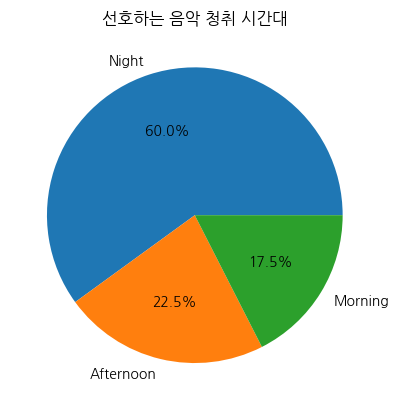

In [77]:
plt.pie(
    spotify_df['music_time_slot'].value_counts(),
    labels=spotify_df['music_time_slot'].value_counts().index,
    autopct='%.1f%%'
)

plt.title('선호하는 음악 청취 시간대')
plt.show()

**밤 시간대**에 듣는 비중이 제일 많고 아침 시간대와 낮 시간대는 비슷하다.

In [78]:
time_dict = {'Morning': 0, 'Afternoon': 1, 'Night': 2}

spotify_df['music_time_slot_numeric'] = spotify_df['music_time_slot'].map(time_dict)
spotify_df[['music_time_slot', 'music_time_slot_numeric']]

,music_time_slot,music_time_slot_numeric
0,Night,2
1,Afternoon,1
2,Night,2
3,Night,2
4,Night,2
...,...,...
515,Morning,0
516,Night,2
517,Night,2
518,Night,2


#### 2-2-7. 컬럼별 분포 확인 (서비스 선호도)

In [84]:
spotify_df['music_expl_method'].value_counts()

recommendations                              113
Playlists                                    112
recommendations, Playlists                    86
Others                                        55
Radio                                         51
Playlists, Radio                              18
recommendations, Playlists, Others            18
recommendations, Others                       15
recommendations, Playlists, Radio             13
Playlists, Others                              9
Radio, Others                                  7
recommendations, Radio                         6
Playlists, Radio, Others                       6
recommendations, Radio, Others                 4
recommendations, Playlists, Radio, Others      2
recommendations,Others, Social media           1
Others, Social media                           1
Others, Friends                                1
recommendations, Others, Social media          1
Others, Search                                 1
Name: music_expl_met

In [91]:
spotify_df['music_recc_rating']

0      3
1      2
2      4
3      4
4      4
      ..
515    5
516    2
517    3
518    2
519    3
Name: music_recc_rating, Length: 520, dtype: int64

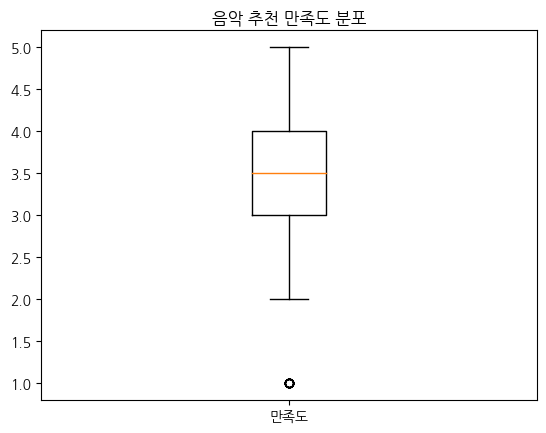

In [98]:
plt.boxplot(
    spotify_df['music_recc_rating'],
    labels=['만족도']
)

plt.title('음악 추천 만족도 분포')

plt.show()

In [102]:
new_spotify_df = spotify_df[[
    'age_median',
    'gender_binary',
    'period_median',
    'subscription_binary',
    'preffered_premium_plan_numeric',
    'fav_music_genre_numeric',
    'music_time_slot_numeric',
    'music_recc_rating'
]]

new_spotify_df

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating
0,27.5,1,24,0,179,0,2,3
1,16.0,0,24,0,119,3,1,2
2,47.5,2,9,0,59,2,2,4
3,27.5,1,18,0,0,0,2,4
4,27.5,1,18,0,0,0,2,4
...,...,...,...,...,...,...,...,...
515,27.5,1,24,0,59,2,0,5
516,27.5,1,24,0,59,2,2,2
517,27.5,1,24,0,59,2,2,3
518,27.5,1,9,1,119,0,2,2


In [106]:
# pickle로 저장
with open('new_spotify_df.pkl', 'wb') as file:
    pickle.dump(new_spotify_df, file)

---

## 3. 데이터 분석

### 3-1. 문제 정의

스포티파이 비즈니스 목표는 **구독 가입자 수를 늘리는 것**으로 정의한다.

목표에 도달하기 위해, 먼저 다음의 두 군집을 식별해 내고자 한다.
- 현재 구독 중이나 잠재적으로 해지할 위험성이 높은 군집 (이상 집단 A)
- 현재 구독 중이 아니지만 잠재적으로 구독할 가능성이 높은 군집 (이상 집단 B)

이어지는 분석 절차는 다음과 같다.
- z-score validation을 통해 집단 A가 지니는 특성을 발견해 낸 뒤, 유저의 이탈을 막기 위한 액션 아이템 도출
- z-score validation을 통해 집단 B가 지니는 특성을 발견해 낸 뒤, 해당 유저들을 유인하기 위한 액션 아이템 도출

### 3-2. 데이터 분석

#### 3-2-1. 데이터 전처리

In [80]:
with open('new_spotify_df.pkl', 'rb') as file:
    new_spotify_df = pickle.load(file)

In [81]:
new_spotify_df

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating
0,27.5,1,24,0,179,0,2,3
1,16.0,0,24,0,119,3,1,2
2,47.5,2,9,0,59,2,2,4
3,27.5,1,18,0,0,0,2,4
4,27.5,1,18,0,0,0,2,4
...,...,...,...,...,...,...,...,...
515,27.5,1,24,0,59,2,0,5
516,27.5,1,24,0,59,2,2,2
517,27.5,1,24,0,59,2,2,3
518,27.5,1,9,1,119,0,2,2


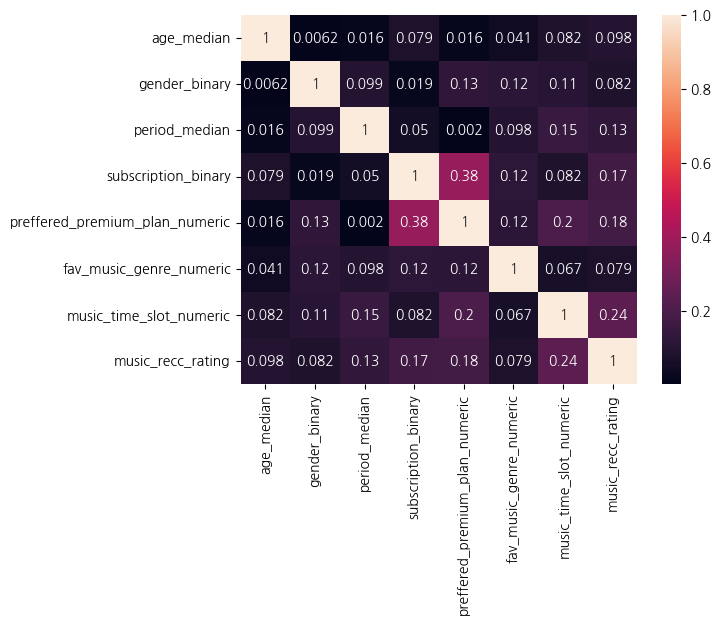

In [82]:
sns.heatmap(
    np.abs(new_spotify_df.corr()),
    annot=True
)

plt.show()

컬럼들 간의 상관관계에는 크게 돋보이는 게 없다. 그냥 진행

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spotify_scaled = pd.DataFrame(scaler.fit_transform(new_spotify_df), columns=new_spotify_df.columns)

spotify_scaled

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating
0,0.116531,0.413654,1.154634,-0.475831,1.659953,-0.739763,0.745826,-0.514859
1,-1.719709,-1.759075,1.154634,-0.475831,0.747055,1.174051,-0.551263,-1.536717
2,3.309990,2.586384,-0.955028,-0.475831,-0.165843,0.536113,0.745826,0.506999
3,0.116531,0.413654,0.310769,-0.475831,-1.063526,-0.739763,0.745826,0.506999
4,0.116531,0.413654,0.310769,-0.475831,-1.063526,-0.739763,0.745826,0.506999
...,...,...,...,...,...,...,...,...
515,0.116531,0.413654,1.154634,-0.475831,-0.165843,0.536113,-1.848352,1.528856
516,0.116531,0.413654,1.154634,-0.475831,-0.165843,0.536113,0.745826,-1.536717
517,0.116531,0.413654,1.154634,-0.475831,-0.165843,0.536113,0.745826,-0.514859
518,0.116531,0.413654,-0.955028,2.101587,0.747055,-0.739763,0.745826,-1.536717


KMeansClustering을 진행하기 위해 군집의 개수를 선정한다.

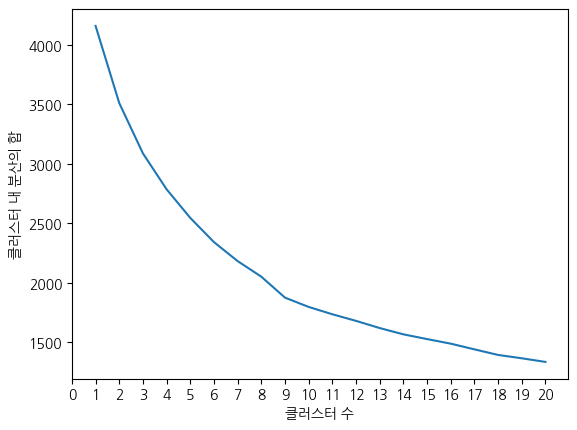

In [86]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(spotify_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.xticks([i for i in range(21)])
plt.xlabel('클러스터 수')
plt.ylabel('클러스터 내 분산의 합')
plt.show()

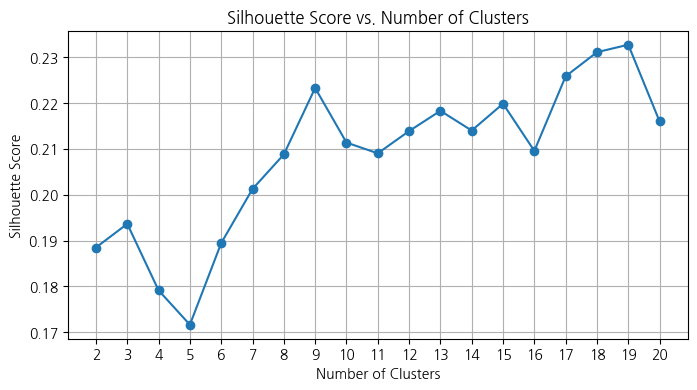

In [96]:
silhouette_scores = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(spotify_scaled)
    
    silhouette_avg = silhouette_score(spotify_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 4))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xticks([i for i in range(2, 21)])
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

확인 결과 **k=19**가 최적인 것 같다.

#### 3-2-2. 클러스터링

In [97]:
model = KMeans(n_clusters=19, random_state=42)
new_spotify_df['cluster'] = model.fit_predict(spotify_scaled)
new_spotify_df['cluster']

0       6
1       8
2      18
3      17
4      17
       ..
515    10
516     2
517     2
518     5
519    11
Name: cluster, Length: 520, dtype: int32

5개의 군집에 대한 특성치를 분석한다.

In [98]:
cluster_stats = new_spotify_df.groupby('cluster').agg('mean')
cluster_stats

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating
cluster,,,,,,,,
0,47.500000,0.222222,13.000000,0.000000,46.222222,0.444444,1.222222,4.222222
1,27.500000,0.966667,10.300000,0.000000,146.000000,0.733333,0.833333,2.533333
2,26.454545,1.000000,22.727273,0.000000,17.878788,0.787879,1.878788,2.666667
3,26.222222,1.037037,7.333333,0.000000,8.740741,0.703704,0.444444,3.555556
4,15.300000,1.000000,11.700000,1.000000,114.650000,1.800000,0.700000,2.600000
5,27.500000,1.035714,13.607143,1.000000,144.714286,1.571429,1.000000,2.571429
6,27.500000,1.000000,18.789474,0.000000,138.736842,0.342105,1.894737,4.131579
7,27.330882,1.000000,7.058824,0.014706,24.338235,0.397059,2.000000,3.750000
8,23.187500,0.000000,17.250000,0.000000,72.375000,1.625000,0.375000,3.500000


In [99]:
new_cluster_stats = cluster_stats.append(
    new_spotify_df.drop('cluster', axis=1).mean(),
    ignore_index=True
)

new_cluster_stats.index = new_cluster_stats.index[:-1].tolist() + ['전체']

new_cluster_stats

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating
0,47.500000,0.222222,13.000000,0.000000,46.222222,0.444444,1.222222,4.222222
1,27.500000,0.966667,10.300000,0.000000,146.000000,0.733333,0.833333,2.533333
2,26.454545,1.000000,22.727273,0.000000,17.878788,0.787879,1.878788,2.666667
3,26.222222,1.037037,7.333333,0.000000,8.740741,0.703704,0.444444,3.555556
4,15.300000,1.000000,11.700000,1.000000,114.650000,1.800000,0.700000,2.600000
5,27.500000,1.035714,13.607143,1.000000,144.714286,1.571429,1.000000,2.571429
6,27.500000,1.000000,18.789474,0.000000,138.736842,0.342105,1.894737,4.131579
7,27.330882,1.000000,7.058824,0.014706,24.338235,0.397059,2.000000,3.750000
8,23.187500,0.000000,17.250000,0.000000,72.375000,1.625000,0.375000,3.500000
9,26.803030,0.000000,22.000000,0.000000,24.272727,1.090909,1.939394,3.878788


```subscription_binary```, ```preffered_premium_plan_numeric```에서 무료 요금제는 0으로 들어가 있음을 고려하면, 앞서 정의한 두 가지 군집을 식별해 낼 수 있다.

- 현재 구독 중이나 잠재적으로 해지할 위험성이 높은 군집 (이상 군집 A): ```subscription_binary``` ↑, ```preffered_premium_plan_numeric``` ↓
- 현재 구독 중이 아니지만 잠재적으로 구독할 가능성이 높은 군집 (이상 군집 B): ```subscription_binary``` ↓, ```preffered_premium_plan_numeric``` ↑

In [104]:
z_scores = stats.zscore(new_cluster_stats.drop('전체'))
z_scores

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating
0,2.527303,-1.159054,-0.576437,-0.574818,-0.662912,-0.722136,-0.108022,1.433860
1,-0.011421,0.499100,-1.104706,-0.574818,1.270629,-0.525711,-0.737642,-1.597959
2,-0.144127,0.573345,1.326756,-0.574818,-1.212164,-0.488623,0.954974,-1.358605
3,-0.173618,0.655841,-1.685150,-0.574818,-1.389246,-0.545857,-1.367263,0.237089
4,-1.560043,0.573345,-0.830789,1.883173,0.663114,0.199551,-0.953512,-1.478282
5,-0.011421,0.652894,-0.457646,1.883173,1.245714,0.044137,-0.467805,-1.529573
6,-0.011421,0.573345,0.556305,-0.574818,1.129880,-0.791719,0.980796,1.271141
7,-0.032888,0.573345,-1.738859,-0.538671,-1.086990,-0.754355,1.151219,0.586147
8,-0.558834,-1.654026,0.255098,-0.574818,-0.156111,0.080562,-1.479695,0.137358
9,-0.099892,-1.654026,1.184461,-0.574818,-1.088259,-0.282583,1.053097,0.817342


In [125]:
# 군집 A
z_scores[
    (z_scores['subscription_binary'] >= stats.norm.ppf(1 - 0.3)) & (z_scores['preffered_premium_plan_numeric'] <= stats.norm.ppf(0.3))
]

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating


In [126]:
# 군집 B
z_scores[
    (z_scores['subscription_binary'] <= stats.norm.ppf(0.3)) & (z_scores['preffered_premium_plan_numeric'] >= stats.norm.ppf(1 - 0.3))
]

,age_median,gender_binary,period_median,subscription_binary,preffered_premium_plan_numeric,fav_music_genre_numeric,music_time_slot_numeric,music_recc_rating
1,-0.011421,0.499100,-1.104706,-0.574818,1.270629,-0.525711,-0.737642,-1.597959
6,-0.011421,0.573345,0.556305,-0.574818,1.129880,-0.791719,0.980796,1.271141
14,-0.011421,0.966411,0.125621,-0.574818,1.328765,1.175453,0.103615,0.190157
15,-1.523456,1.097433,-0.392290,-0.574818,1.260370,-0.024427,-0.943989,-0.865817


군집 A가 식별되지 않음에 따라, 군집 B에 대한 분석만을 수행한다. 현재 구독 중이 아니지만 **잠재적으로 구독할 가능성이 높은 군집**의 특성을 살펴본다.

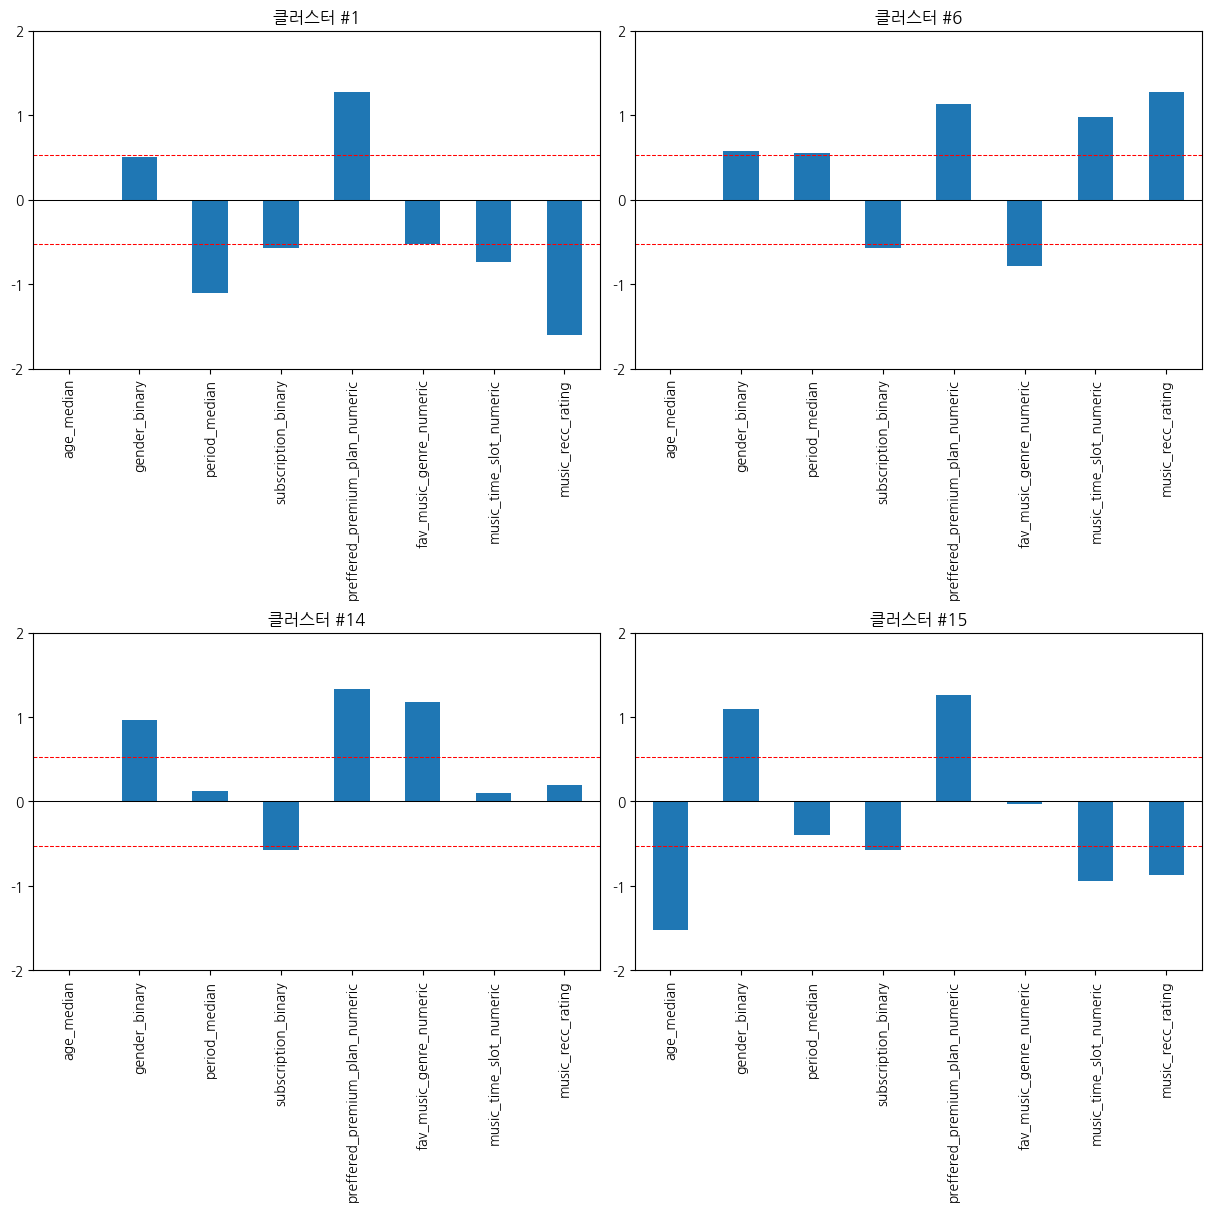

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), constrained_layout=True)
target_cluster = [1, 6, 14, 15]

for i in range(2):
    for j in range(2):
        axes[i][j].set_title(f"클러스터 #{target_cluster[2 * i + j]}")
        z_scores.loc[target_cluster[2 * i + j]].plot(kind='bar', ax=axes[i][j])
        axes[i][j].set_yticks([i for i in range(-2, 3)])
        axes[i][j].axhline(stats.norm.ppf(0.3), color='red', linestyle='--', linewidth=0.75)
        axes[i][j].axhline(0, color='black', linewidth=0.75)
        axes[i][j].axhline(-stats.norm.ppf(0.3), color='red', linestyle='--', linewidth=0.75)

- 클러스터 1: 가입한 지 얼마 안 됨, 아침에 주로 들음, 음악 추천 만족도 낮음
- 클러스터 6: 메이저한 취향, 밤에 많이 들음, 음악 추천 만족도 높음
- 클러스터 14: 여성, 마이너한 취향
- 클러스터 15: 나이 어림, 여성, 아침에 많이 들음, 음악 추천 만족도 낮음

### 3-3. 결과 해석

현재 구독 중이 아니지만 잠재적으로 구독할 가능성이 높은 4개의 군집을 분석해 본 결과 위에 주관적 생각을 얹어본다.
- 클러스터 1: 아직 가입한 지 얼마 안 되어 음악 추천을 위한 표본이 많이 쌓이지는 않았으나, 서비스에 흥미를 느끼고 있다. 이 유형의 경우 점차 취향 표본이 쌓이면서 추천의 정확도가 올라갈 것이다. 딱히 **별다른 액션을 취하지 않아도** 스포티파이 기능을 이용하면서 만족도를 쌓아나갈 유형이다.
- 클러스터 6: 대중적인 취향을 지니고 있는 유저인데다가 서비스 만족도도 아주 높다. 아직은 무료로 이용 중이지만 특별한 계기가 있다면 가까운 시일 내에 구독을 진행할 것이다. 이 유저들을 **메인 타겟**으로 삼을 필요가 있다. 메이저한 취향의 유저들을 대상으로 **처음 3개월 할인 쿠폰을 발급**하는 마케팅 전략을 이용할 수 있다.
- 클러스터 14: 마이너한 취향을 가지고 있기에 음악 추천 서비스가 정밀하게 제공되기 어렵다. 그럼에도 불구하고 불만족 중이 아니라는 점이 희망적이다. 이들을 위해 대중적이지 않은 장르에 대한 **추천 알고리즘**을 다듬을 필요가 있다. 그렇게 된다면 자연스럽게 서비스 만족도가 상승하면서 구독 유저로 전환될 수 있다.
- 클러스터 15: 아직 나이가 어린 유저들인 만큼 자신의 취향이 확고히 정립되지 않았다고 볼 수 있다. 클러스터 1과 마찬가지로, 스포티파이 서비스를 이용하면서 자연스럽게 만족도를 쌓아나갈 유형으로 생각된다. 마찬가지로 **별다른 액션을 취하지 않는 것**이 유리할 수 있겠다.

결론적으로, 유저 로그를 클러스터 6의 속성으로 필터링하여 대상자에 해당하는 경우 할인 팝업을 띄워 **이 창에서만 3개월 할인**과 같은 식으로 할인 상품을 판매하는 전략을 취할 수 있다. 또한 ML 엔지니어링 팀의 주요 목표로 **마이너한 취향에 대한 추천 알고리즘 가다듬기**를 설정하는 것도 도움이 될 것이다.